In [29]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_sample_weight

In [2]:
df = pd.read_csv("/home/local/ASURITE/speddira/dev/git_repo/traffic_sense_net/city_scale/processed_datasets/processed_dataset_2024-2-16_1915hours_2592000steps.csv")

/tmp/ipykernel_392154/1206764755.py:1: DtypeWarning: Columns (129,131,132,134) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/home/local/ASURITE/speddira/dev/git_repo/traffic_sense_net/city_scale/processed_datasets/processed_dataset_2024-2-16_1915hours_2592000steps.csv")


In [3]:
df.head()

,Unnamed: 0,step,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,...,rolling_travel_time_6_22,rolling_travel_time_21_7,rolling_travel_time_1_16,rolling_travel_time_15_2,rolling_travel_time_19_23,rolling_travel_time_28_20,rolling_travel_time_32_16,rolling_travel_time_15_29,rolling_travel_time_36_18,rolling_travel_time_17_37
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df[299:]
Y = df["accident_label"]
X = df.drop(["incident_edge","incident_start_time","incident_type","accident_id","accident_duration","incident_lane","accident_label"],axis=1)

In [6]:
Y.head()

299    False
300    False
301    False
302    False
303    False
Name: accident_label, dtype: bool

In [19]:
print(sample_weights)
print(set(sample_weights))

[0.86736401 0.86736401 0.86736401 ... 0.86736401 0.86736401 0.86736401]
{0.8673640069343579, 1.1805239361532527}


In [7]:
print(Y.shape)

(2591701,)


In [8]:
X.head()

,Unnamed: 0,step,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,...,rolling_travel_time_6_22,rolling_travel_time_21_7,rolling_travel_time_1_16,rolling_travel_time_15_2,rolling_travel_time_19_23,rolling_travel_time_28_20,rolling_travel_time_32_16,rolling_travel_time_15_29,rolling_travel_time_36_18,rolling_travel_time_17_37
299,299,299,1.357526,0.190000,0.003382,0.778788,0.423333,0.021093,4.507942,2.323333,...,61.636364,55.357143,NaN,NaN,124.0,134.666667,NaN,NaN,63.888889,51.541667
300,300,300,1.383737,0.196667,0.003500,0.812956,0.430000,0.021515,4.507942,2.323333,...,61.636364,55.357143,NaN,NaN,124.0,134.666667,NaN,NaN,63.888889,51.541667
301,301,301,1.409860,0.203333,0.003618,0.842962,0.440000,0.022003,4.507942,2.323333,...,61.636364,55.357143,NaN,194.0,124.0,134.666667,NaN,NaN,63.888889,51.541667
302,302,302,1.435945,0.210000,0.003736,0.870705,0.453333,0.022642,4.507942,2.323333,...,61.636364,55.357143,NaN,194.0,124.0,134.666667,NaN,NaN,63.888889,51.541667
303,303,303,1.462029,0.216667,0.003854,0.896841,0.466667,0.023229,4.507942,2.323333,...,61.636364,55.357143,NaN,195.0,124.0,134.666667,NaN,NaN,63.888889,51.541667


In [9]:
print(X.shape)

(2591701, 153)


In [10]:
def standardize(col):
   return (col - col.mean()) / col.std()

X = X.apply(standardize)

In [32]:
X.head()

,rolling_junction_mean_speed_0,rolling_traffic_count_0,rolling_traffic_occupancy_0,rolling_junction_mean_speed_1,rolling_traffic_count_1,rolling_traffic_occupancy_1,rolling_junction_mean_speed_2,rolling_traffic_count_2,rolling_traffic_occupancy_2,rolling_junction_mean_speed_3,...,rolling_travel_time_6_22,rolling_travel_time_21_7,rolling_travel_time_1_16,rolling_travel_time_15_2,rolling_travel_time_19_23,rolling_travel_time_28_20,rolling_travel_time_32_16,rolling_travel_time_15_29,rolling_travel_time_36_18,rolling_travel_time_17_37
299,-3.603346,-1.055335,-1.062028,-4.763356,-1.666629,-1.717245,-1.913884,-0.836444,-0.864972,-2.383142,...,-0.258437,-0.506865,NaN,NaN,-0.153611,-0.209216,NaN,NaN,-0.44509,-0.771216
300,-3.581758,-1.052124,-1.058835,-4.724212,-1.662018,-1.710861,-1.913884,-0.836444,-0.864972,-2.383142,...,-0.258437,-0.506865,NaN,NaN,-0.153611,-0.209216,NaN,NaN,-0.44509,-0.771216
301,-3.560243,-1.048913,-1.055642,-4.689837,-1.655103,-1.703474,-1.913884,-0.836444,-0.864972,-2.383142,...,-0.258437,-0.506865,NaN,-0.247766,-0.153611,-0.209216,NaN,NaN,-0.44509,-0.771216
302,-3.538759,-1.045702,-1.052450,-4.658054,-1.645882,-1.693800,-1.913884,-0.836444,-0.864972,-2.383142,...,-0.258437,-0.506865,NaN,-0.247766,-0.153611,-0.209216,NaN,NaN,-0.44509,-0.771216
303,-3.517275,-1.042492,-1.049257,-4.628112,-1.636662,-1.684917,-1.913884,-0.836444,-0.864972,-2.383142,...,-0.258437,-0.506865,NaN,-0.238223,-0.153611,-0.209216,NaN,NaN,-0.44509,-0.771216


In [33]:
X = X.drop(["Unnamed: 0","step"],axis=1)



KeyError: "['Unnamed: 0', 'step'] not found in axis"

In [34]:
X= X.values

In [35]:
Y= Y.values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [37]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)

In [38]:
model = XGBClassifier()
model.fit(X_train, y_train,sample_weight=sample_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred = model.predict(X_test)
print(y_pred)

[0 1 1 ... 1 0 1]


In [40]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("precision: %.2f%%" % (precision * 100.0))
print("f1: %.2f%%" % (f1 * 100.0))
print("recall: %.2f%%" % (recall * 100.0))

Accuracy: 94.21%
precision: 96.37%
f1: 92.92%
recall: 89.72%


<Axes: >

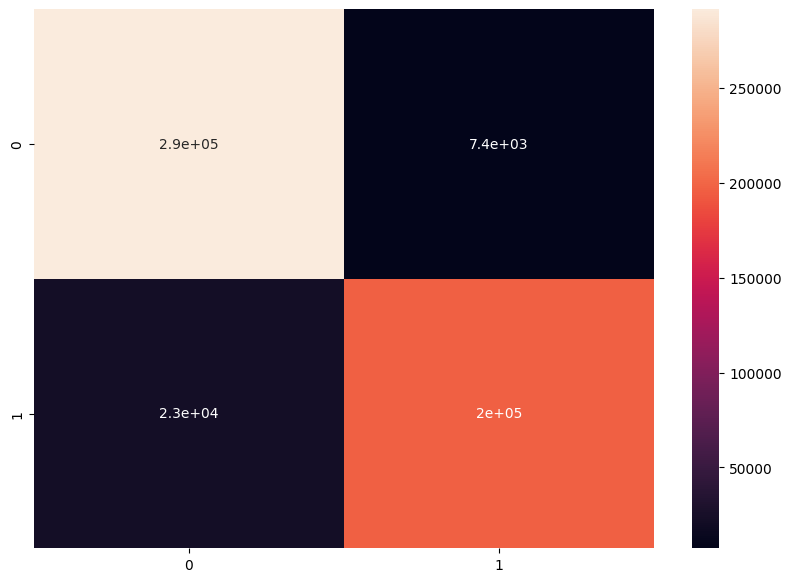

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(matrix, annot=True)


In [31]:
import pickle
pickle.dump(model, open("/home/local/ASURITE/speddira/dev/git_repo/traffic_sense_net/city_scale/xgboost/saved_models/V1/xg_model.pkl", "wb"))
